In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [167]:
# load data
movies = pd.read_csv('data/movies.txt',delimiter="\t", header=None)
movies.columns = ['ID', 'Title', 'Unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
data = pd.read_csv('data/data.txt',delimiter="\t", header=None)
data.columns = ['User', 'Movie', 'Rating']

In [168]:
# find movies with duplicate titles but different IDs and remove 
# duplicate rows
titles = []
unique_idx = []
row = 0
drop = []
dups = {}

for title in movies['Title']:
    if title in titles:
        print(title)
        drop.append(row)
        dups[titles.index(title) + 1] = row + 1
    else:
        unique_idx.append(row)

    titles.append(title)
    row += 1
    
movies.drop(drop, inplace = True) 

# replace duplicate IDs in data
for duplicate in dups:
    data['Movie'].replace(dups[duplicate], duplicate, inplace=True)

Chasing Amy (1997)
Ulee's Gold (1997)
Desperate Measures (1998)
Fly Away Home (1996)
Body Snatchers (1993)
Kull the Conqueror (1997)
Ice Storm, The (1997)
Money Talks (1997)
That Darn Cat! (1997)
Designated Mourner, The (1997)
Deceiver (1997)
Hurricane Streets (1998)
Hugo Pool (1997)
Nightwatch (1997)
Butcher Boy, The (1998)
Chairman of the Board (1998)
Substance of Fire, The (1996)
Sliding Doors (1998)


Text(11.5,0.5,'Number of Occurrences')

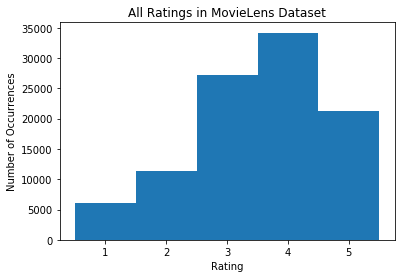

In [169]:
# histogram of all ratings
plt.hist(data['Rating'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.savefig('basic_1')
plt.title('All Ratings in MovieLens Dataset')
plt.xlabel('Rating')
plt.ylabel('Number of Occurrences')

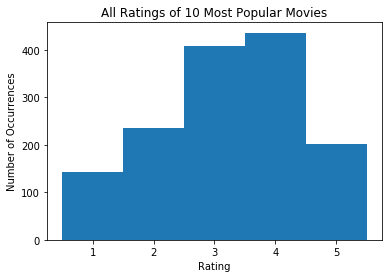

In [190]:
# get IDs of 10 most popular movies
pop = data['Movie'].value_counts().head(10).index
all_ratings = []

for idx in pop:
    counts = data['Rating'].loc[data['Movie'] == idx + 1] # add 1 to account for 1-indexing
    all_ratings = np.concatenate((counts, all_ratings))

# plot all ratings for 10 most popular movies
plt.hist(all_ratings, bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.title('All Ratings of 10 Most Popular Movies')
plt.xlabel('Rating')
plt.ylabel('Number of Occurrences')
plt.savefig('basic_2')

In [174]:
# find number of ratings and average rating for each movie
movies['num_ratings'] = [0]*len(movies)
movies['tot_rating'] = [0]*len(movies)
movies['avg_rating'] = [0.0]*len(movies)

# get number of ratings
for i in range(len(data)):
    movie = data['Movie'][i] - 1 # IDs are 1-indexed
    movies.loc[movie, 'num_ratings'] += 1
    movies.loc[movie, 'tot_rating'] += data['Rating'][i]
    
for i in unique_idx:
    if movies['num_ratings'][i] != 0:
        movies['avg_rating'][i]= movies['tot_rating'][i] / movies['num_ratings'][i]

C:\Users\amanda\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [191]:
# save updated dataframe
movies.to_csv('data/movies.csv') 

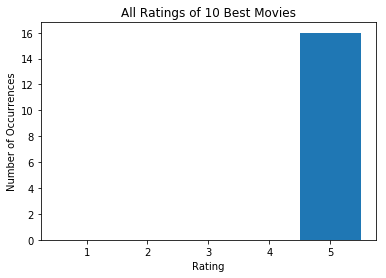

In [189]:
# get top 10 highest-rated movies
sorted_df = movies.sort_values(by='avg_rating', ascending=False)
best = sorted_df.head(10).index

best_ratings = []

for idx in best:
    counts = data['Rating'].loc[data['Movie'] == idx+1]
    best_ratings = np.concatenate((counts, best_ratings))

# plot all ratings for 10 most popular movies
plt.hist(best_ratings, bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.title('All Ratings of 10 Best Movies')
plt.xlabel('Rating')
plt.ylabel('Number of Occurrences')
plt.savefig('basic_3')

In [185]:
sorted_df.head(10)

,ID,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_ratings,tot_rating,avg_rating
1598,1599,Someone Else's America (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5,5.0
1188,1189,Prefontaine (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,15,5.0
1535,1536,Aiqing wansui (1994),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5,5.0
1292,1293,Star Kid (1997),0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,3,15,5.0
1652,1653,Entertaining Angels: The Dorothy Day Story (1996),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5,5.0
1121,1122,They Made Me a Criminal (1939),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,5,5.0
1200,1201,Marlene Dietrich: Shadow and Light (1996),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,5,5.0
813,814,"Great Day in Harlem, A (1994)",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,5,5.0
1466,1467,"Saint of Fort Washington, The (1993)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,10,5.0
1499,1500,Santa with Muscles (1996),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2,10,5.0
